In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from tsai.all import *
import tensorflow as tf


# SƠ LƯỢC DỮ LIỆU

In [391]:
df = pd.read_csv("data/thu_chi_csv.csv", index_col=0)
print(f"Dữ liệu bao gồm {df.shape[0]} dòng và {df.shape[1]} cột:")
print ('Mẫu bảng dữ liệu:\n')
df.head()

Dữ liệu bao gồm 4836 dòng và 10 cột:
Mẫu bảng dữ liệu:



,Ngày,Giờ,Số tiền thu,Số tiền chi,Số dư,Hạng mục cha,Hạng mục con,Chi cho ai,Chuyến đi/Sự kiện,Diễn giải
STT,,,,,,,,,,
1,01/04/2023,16:42,13653000,0,-163716587,Lương,NaN,NaN,NaN,Nam á
2,01/04/2023,16:40,0,300000,-177369587,Hiếu hỉ,Biếu tặng,NaN,NaN,Kem mắt mẹ
3,01/04/2023,16:39,0,37000,-177069587,Ăn uống,Cafe,NaN,NaN,NaN
4,01/04/2023,16:39,0,50000,-177032587,Đi lại,Xăng xe,NaN,NaN,NaN
5,01/04/2023,16:37,0,30000,-176982587,Ăn uống,NaN,NaN,NaN,NaN


In [392]:
df.drop(["Chi cho ai","Chuyến đi/Sự kiện", "Diễn giải"], axis=1, inplace=True)
print ('Mẫu bảng dữ liệu 2:\n')
df.head()

Mẫu bảng dữ liệu 2:



,Ngày,Giờ,Số tiền thu,Số tiền chi,Số dư,Hạng mục cha,Hạng mục con
STT,,,,,,,
1,01/04/2023,16:42,13653000,0,-163716587,Lương,NaN
2,01/04/2023,16:40,0,300000,-177369587,Hiếu hỉ,Biếu tặng
3,01/04/2023,16:39,0,37000,-177069587,Ăn uống,Cafe
4,01/04/2023,16:39,0,50000,-177032587,Đi lại,Xăng xe
5,01/04/2023,16:37,0,30000,-176982587,Ăn uống,NaN


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4836 entries, 1 to 4836
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ngày          4836 non-null   object
 1   Giờ           4836 non-null   object
 2   Số tiền thu   4836 non-null   int64 
 3   Số tiền chi   4836 non-null   int64 
 4   Số dư         4836 non-null   int64 
 5   Hạng mục cha  4832 non-null   object
 6   Hạng mục con  1732 non-null   object
dtypes: int64(3), object(4)
memory usage: 302.2+ KB


In [394]:
df.describe()

,Số tiền thu,Số tiền chi,Số dư
count,4.836000e+03,4.836000e+03,4.836000e+03
mean,6.763136e+04,9.241239e+04,-1.653381e+08
std,1.400192e+06,5.518006e+05,7.644851e+07
min,0.000000e+00,0.000000e+00,-2.881691e+08
25%,0.000000e+00,1.500000e+04,-2.460990e+08
50%,0.000000e+00,2.500000e+04,-1.669201e+08
75%,0.000000e+00,4.200000e+04,-9.279950e+07
max,5.785000e+07,3.000000e+07,-4.392150e+07


Rename columns

In [395]:
df = df.rename(columns={"Ngày":"date", "Giờ":"time", "Số tiền thu":"income","Số tiền chi":"spend", "Số dư":"balance","Hạng mục con":"small_category" , "Hạng mục cha": "big_category" })

In [396]:
df.columns

Index(['date', 'time', 'income', 'spend', 'balance', 'big_category',
       'small_category'],
      dtype='object')

Feature engineer with date time

In [397]:
# Convert the date column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [398]:
df.head()

,date,time,income,spend,balance,big_category,small_category
STT,,,,,,,
1,2023-04-01,16:42,13653000,0,-163716587,Lương,NaN
2,2023-04-01,16:40,0,300000,-177369587,Hiếu hỉ,Biếu tặng
3,2023-04-01,16:39,0,37000,-177069587,Ăn uống,Cafe
4,2023-04-01,16:39,0,50000,-177032587,Đi lại,Xăng xe
5,2023-04-01,16:37,0,30000,-176982587,Ăn uống,NaN


In [399]:
# Sort the dataframe by date
df = df.sort_values(by='STT', ascending=False).reset_index()
df.drop(["STT"], axis=1, inplace=True)


In [400]:
# Extract year, month, and day columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [401]:
# Extract hour and minute columns
df['hour'] = df['time'].str.split(':', expand=True)[0]
df['minute'] = df['time'].str.split(':', expand=True)[1]

# Convert hour and minute columns to numeric type
df['hour'] = pd.to_numeric(df['hour'])
df['minute'] = pd.to_numeric(df['minute'])

In [402]:
df.tail()

,date,time,income,spend,balance,big_category,small_category,year,month,day,hour,minute
4831,2023-04-01,16:37,0,30000,-176982587,Ăn uống,NaN,2023,4,1,16,37
4832,2023-04-01,16:39,0,50000,-177032587,Đi lại,Xăng xe,2023,4,1,16,39
4833,2023-04-01,16:39,0,37000,-177069587,Ăn uống,Cafe,2023,4,1,16,39
4834,2023-04-01,16:40,0,300000,-177369587,Hiếu hỉ,Biếu tặng,2023,4,1,16,40
4835,2023-04-01,16:42,13653000,0,-163716587,Lương,NaN,2023,4,1,16,42


I will divide the money with 1000 to shorten the data range

In [403]:
money_cols = ["income","spend","balance"]
def money_div_1000(dataframe, cols = money_cols):
    for col in cols:
        dataframe[col] = dataframe[col]/1000
    return dataframe    
df = money_div_1000 (df)
df.head()

,date,time,income,spend,balance,big_category,small_category,year,month,day,hour,minute
0,2019-01-01,10:55,0.0,46.0,-43921.5,Đi lại,Xăng xe,2019,1,1,10,55
1,2019-01-01,10:55,0.0,45.0,-43966.5,Ăn uống,NaN,2019,1,1,10,55
2,2019-01-01,10:56,0.0,100.0,-44066.5,Phát triển bản thân,"Giao lưu, quan hệ",2019,1,1,10,56
3,2019-01-01,10:56,0.0,23.0,-44089.5,Ăn uống,NaN,2019,1,1,10,56
4,2019-01-01,18:21,0.0,20.0,-44109.5,Ăn uống,NaN,2019,1,1,18,21


In [404]:
# Aggregate the dataframe by day and sum the money out column for each category
df_money_out = df.groupby(['date', 'big_category']).agg({'spend': ['sum']})
df_money_out.columns = ['spend_sum']
df_money_out = df_money_out.reset_index()
df_money_out.head(8)

,date,big_category,spend_sum
0,2019-01-01,Phát triển bản thân,100.0
1,2019-01-01,Ăn uống,88.0
2,2019-01-01,Đi lại,46.0
3,2019-01-02,Ăn uống,59.0
4,2019-01-04,Nhà cửa,114.0
5,2019-01-04,Phát triển bản thân,50.0
6,2019-01-04,Trang phục,30.0
7,2019-01-04,Ăn uống,35.0


In [405]:
df_money_out_a_day = df.groupby(['date']).agg({'spend': ['sum']})
df_money_out_a_day.columns = ['spend_in_a_day']

In [406]:
df_money_out_a_day.head()

,spend_in_a_day
date,
2019-01-01,234.0
2019-01-02,59.0
2019-01-04,237.0
2019-01-06,173.0
2019-01-08,147.0


The correlation between date and spend/income

<Axes: xlabel='date', ylabel='spend_in_a_day'>

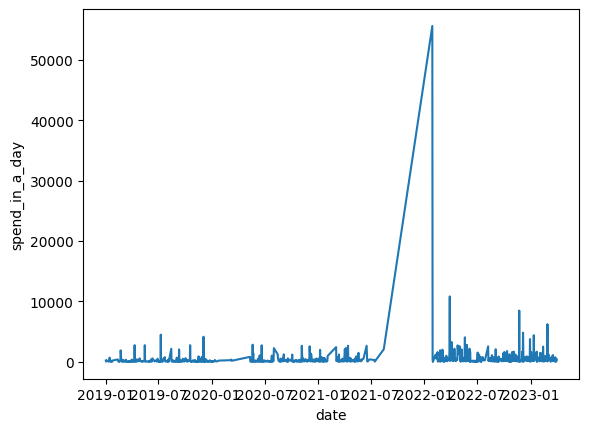

In [407]:
sns.lineplot(x='date', y='spend_in_a_day', data=df_money_out_a_day)

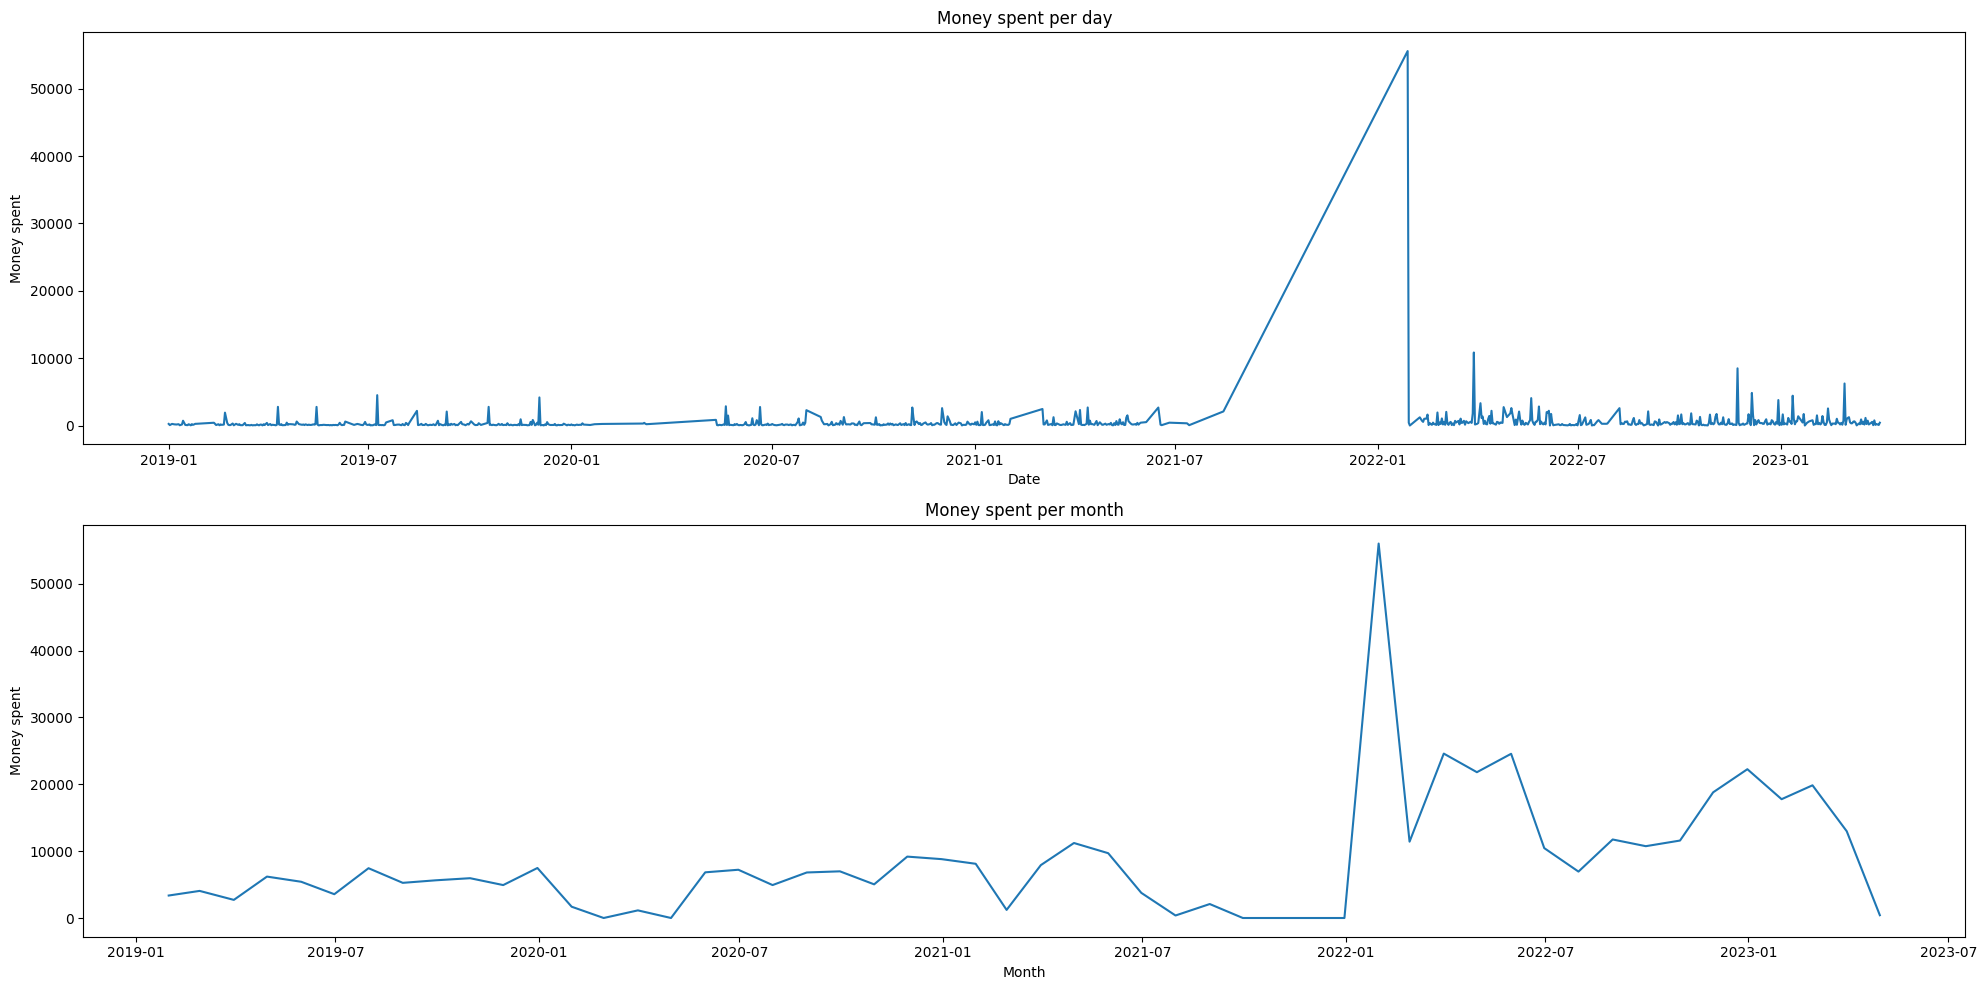

In [408]:
# Group the data by day, month, and year and sum the money spent
daily_totals = df.groupby('date').sum()
monthly_totals = df.resample('M', on='date').sum()
yearly_totals = df.resample('Y', on='date').sum()

# Create subplots for the different time periods
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# Plot the daily totals
axs[0].plot(daily_totals.index, daily_totals['spend'])
axs[0].set_title('Money spent per day')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Money spent')

# Plot the monthly totals
axs[1].plot(monthly_totals.index, monthly_totals['spend'])
axs[1].set_title('Money spent per month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Money spent')

# Show the plot
plt.tight_layout()
plt.show()

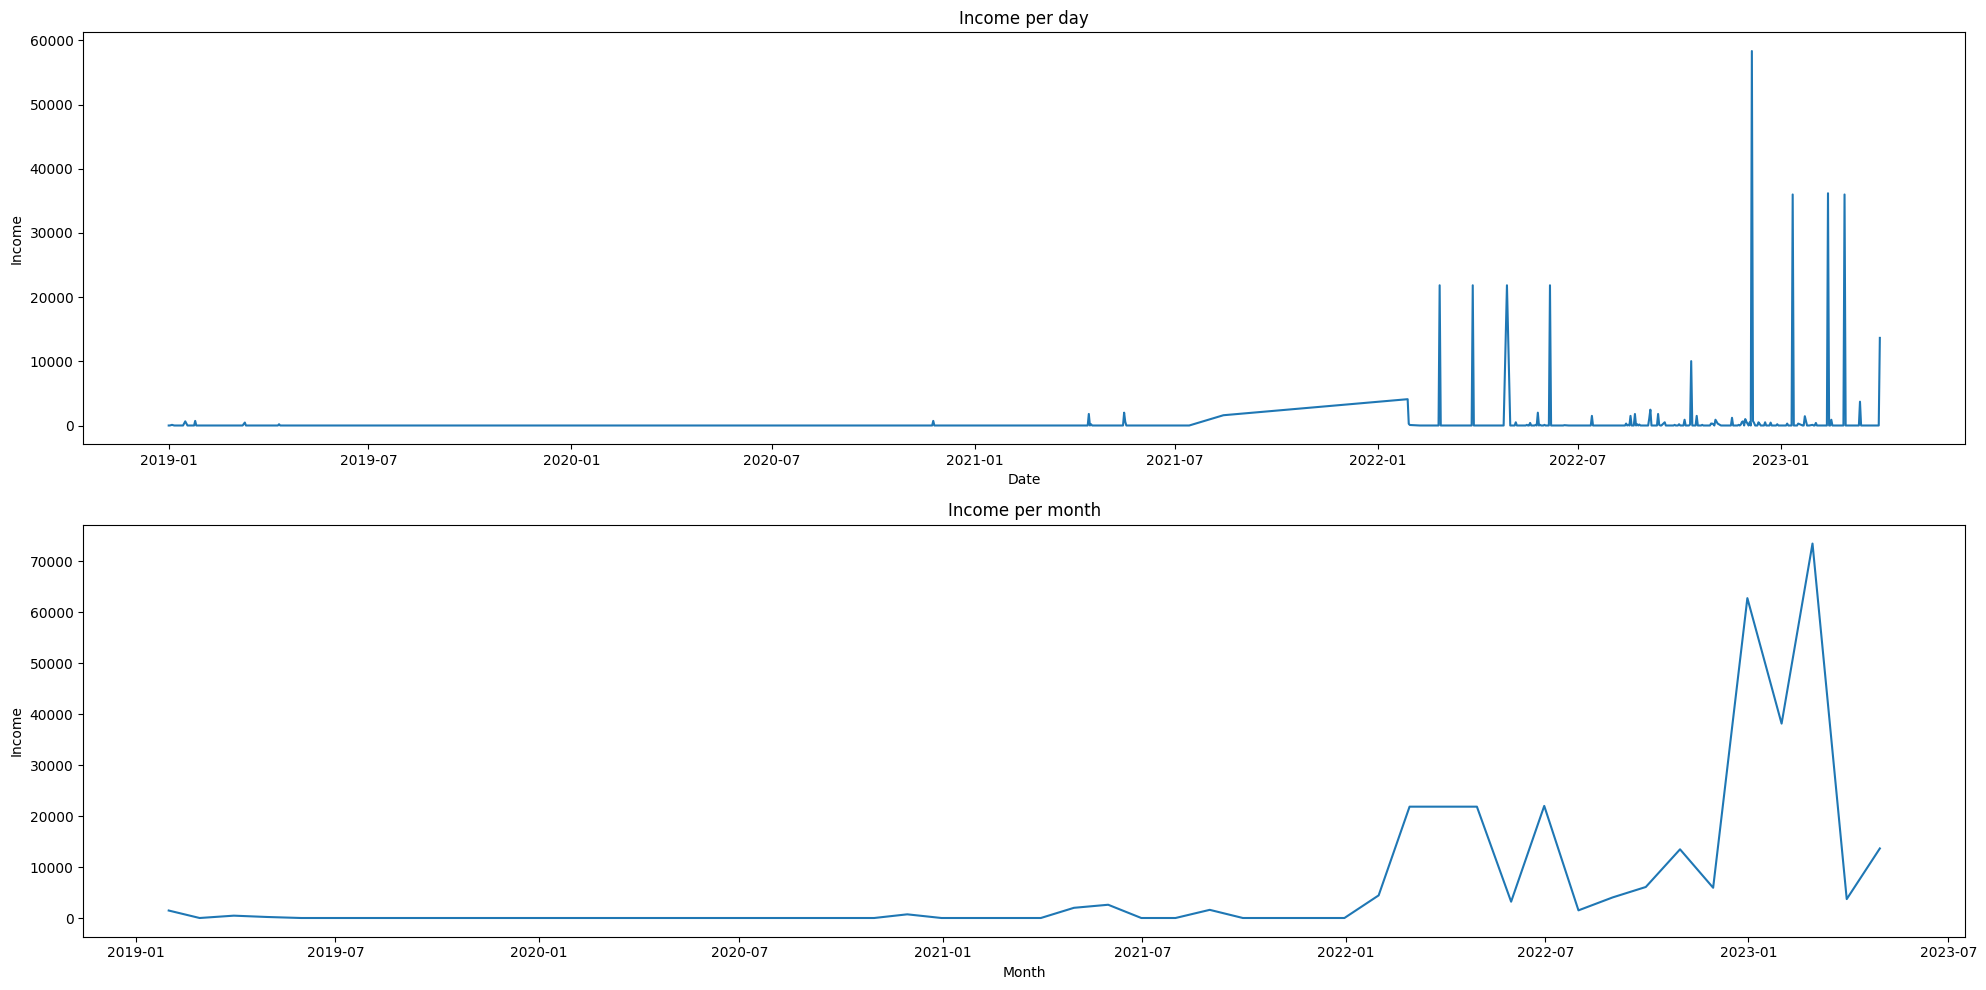

In [409]:
# Create subplots for the different time periods
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# Plot the daily totals
axs[0].plot(daily_totals.index, daily_totals['income'])
axs[0].set_title('Income per day')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Income')

# Plot the monthly totals
axs[1].plot(monthly_totals.index, monthly_totals['income'])
axs[1].set_title('Income per month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Income')

# Show the plot
plt.tight_layout()
plt.show()

The coorrelation between category and spend

In [410]:
df_money_out_category = df.groupby(['big_category'])['spend'].sum().reset_index()

In [411]:
df_money_out_category.head(20)

,big_category,spend
0,Cho Ngân,15699.620
1,Dịch vụ sinh hoạt,5705.000
2,Hiếu hỉ,23639.000
3,Hưởng thụ,24404.000
4,Khác,0.000
5,Lương,0.000
6,Nhà cửa,55855.700
7,Phát triển bản thân,128052.400
8,Sức khỏe,14433.000
9,Trang phục,19073.000


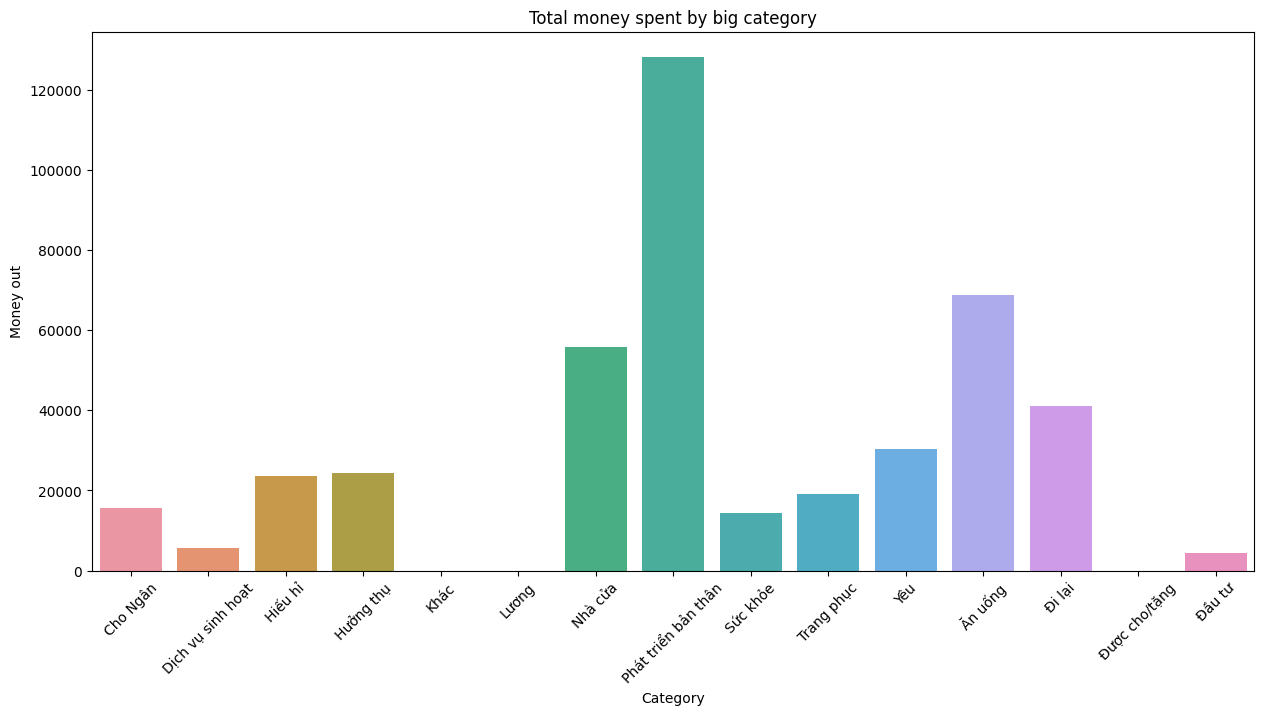

In [412]:
fig, ax = plt.subplots(figsize=(15, 7))
# Create a bar chart to show the total money spent in each category and big category
sns.barplot(x="big_category", y="spend", data=df_money_out_category)

# Set the chart title and axis labels

plt.title("Total money spent by big category")
plt.xlabel("Category")
plt.ylabel("Money out")
ax.tick_params(axis='x', rotation=45)

# Show the chart
plt.show()

# TRAINING

In [445]:
df.head()

,date,time,income,spend,balance,big_category,small_category,year,month,day,hour,minute
0,2019-01-01,10:55,0.0,46.0,-43921.5,Đi lại,Xăng xe,2019,1,1,10,55
1,2019-01-01,10:55,0.0,45.0,-43966.5,Ăn uống,NaN,2019,1,1,10,55
2,2019-01-01,10:56,0.0,100.0,-44066.5,Phát triển bản thân,"Giao lưu, quan hệ",2019,1,1,10,56
3,2019-01-01,10:56,0.0,23.0,-44089.5,Ăn uống,NaN,2019,1,1,10,56
4,2019-01-01,18:21,0.0,20.0,-44109.5,Ăn uống,NaN,2019,1,1,18,21


In [446]:
data = df.groupby(['year', 'month']).sum().reset_index()
# Print the result
data.tail(7)

,year,month,income,spend,balance,day,hour,minute
39,2022,10,13480.00,11585.000,-3.791051e+07,2208,2100,3729
40,2022,11,5935.00,18798.500,-4.427796e+07,2344,2442,4371
41,2022,12,62780.00,22256.120,-4.649365e+07,2942,2703,5838
42,2023,1,38150.00,17771.095,-2.651827e+07,1254,1632,3509
43,2023,2,73490.00,19847.500,-2.996000e+07,2228,1968,3494
44,2023,3,3710.25,12978.000,-2.231933e+07,1979,1598,3588
45,2023,4,13653.00,417.000,-8.721709e+05,5,80,197


Because I want to predict the amount of money I used in a month so we will remove all the day, hour and minute, then feature engineer for month and year

In [447]:
# Convert hour and minute columns to radians
data['month_rad'] = 2 * np.pi * data['month'] / 12

# Convert hour and minute columns to sin and cos values
data['month_sin'] = np.sin(data['month_rad'])
data['month_cos'] = np.cos(data['month_rad'])

In [448]:
data.head()

,year,month,income,spend,balance,day,hour,minute,month_rad,month_sin,month_cos
0,2019,1,1467.0,3362.0,-4690109.0,1549,1591,2966,0.523599,0.500000,8.660254e-01
1,2019,2,0.0,4053.0,-3677830.5,1501,1038,2670,1.047198,0.866025,5.000000e-01
2,2019,3,460.0,2709.0,-6608249.0,2227,1916,3518,1.570796,1.000000,6.123234e-17
3,2019,4,200.0,6193.0,-6612139.0,1665,1750,3959,2.094395,0.866025,-5.000000e-01
4,2019,5,0.0,5420.0,-8458852.5,2137,1853,3802,2.617994,0.500000,-8.660254e-01


In [449]:
data.drop(["balance","day","hour", "minute"], axis=1, inplace=True)
data.head()

,year,month,income,spend,month_rad,month_sin,month_cos
0,2019,1,1467.0,3362.0,0.523599,0.500000,8.660254e-01
1,2019,2,0.0,4053.0,1.047198,0.866025,5.000000e-01
2,2019,3,460.0,2709.0,1.570796,1.000000,6.123234e-17
3,2019,4,200.0,6193.0,2.094395,0.866025,-5.000000e-01
4,2019,5,0.0,5420.0,2.617994,0.500000,-8.660254e-01


In [450]:
data.columns

Index(['year', 'month', 'income', 'spend', 'month_rad', 'month_sin',
       'month_cos'],
      dtype='object')

Make sliding window

In [451]:
# define sliding window size
window_size = 5

# create input and output data using sliding window
def create_dataset(data):
    X = []
    y = []
    for i in range(len(data) - window_size - 1):
        window = data[i:(i + window_size)]
        X.append(window)
        y.append(data[i + window_size + 1])
    return np.array(X), np.array(y)

In [452]:
# prepare data
X, y = create_dataset(data[['year', 'month', 'income', 'spend', 'month_rad', 'month_sin','month_cos']].values)

split data

In [453]:
# split data into training and testing sets
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [455]:
OUT_STEPS = 1
num_features = len(data.columns)
model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(1024, return_sequences=True),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.LSTM(1024, return_sequences=False),
    
    tf.keras.layers.Dense(512, activation = 'relu'), 
    
    tf.keras.layers.Dense(256),
    
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [456]:
# compile model
model.compile(optimizer='adam', loss='mse')

# train model
model.fit(X_train, y_train, epochs=50, batch_size=16)


Epoch 1/50
2/2 [==============================] - 5s 143ms/step - loss: 37338732.0000
Epoch 2/50
2/2 [==============================] - 0s 147ms/step - loss: 37335488.0000
Epoch 3/50
2/2 [==============================] - 0s 148ms/step - loss: 37318764.0000
Epoch 4/50
2/2 [==============================] - 0s 155ms/step - loss: 37282784.0000
Epoch 5/50
2/2 [==============================] - 0s 142ms/step - loss: 37214168.0000
Epoch 6/50
2/2 [==============================] - 0s 139ms/step - loss: 37100692.0000
Epoch 7/50
2/2 [==============================] - 0s 140ms/step - loss: 36895108.0000
Epoch 8/50
2/2 [==============================] - 0s 140ms/step - loss: 36654960.0000
Epoch 9/50
2/2 [==============================] - 0s 145ms/step - loss: 36283396.0000
Epoch 10/50
2/2 [==============================] - 0s 141ms/step - loss: 35731496.0000
Epoch 11/50
2/2 [==============================] - 0s 143ms/step - loss: 35094840.0000
Epoch 12/50
2/2 [==============================] - 0

In [457]:

# evaluate model
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 684ms/step - loss: 185121760.0000


185121760.0

In [458]:
# predict next month's spend
last_month_data = data.iloc[-window_size:][['year', 'month', 'income', 'spend', 'month_rad', 'month_sin','month_cos']].values.reshape((1, window_size, len(data.columns)))
predicted_spend = model.predict(last_month_data)

1/1 [==============================] - 0s 396ms/step


In [459]:
print(predicted_spend)

[[[1.9244818e+03 9.2765379e+00 3.4524304e+03 9.5662832e+03 4.9465113e+00
   4.2778397e-01 4.8384957e-02]]]
